# GSS - General Social Survey

In [1]:
# Import library pandas, numpy dan baca dataset
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

gss = pd.read_hdf('gss.hdf5', 'gss')
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


In [2]:
educ = gss['educ']

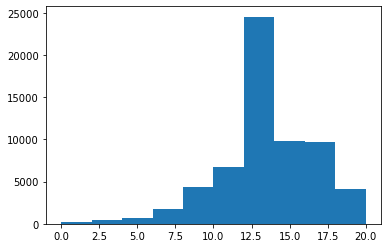

In [3]:
# standard plot
plt.hist(educ.dropna(), label='educ')
plt.show()

## PMF - Probability Mass Function

In [4]:
# import library
from empiricaldist import Pmf

# Compute the PMF for education
# Probability Mass function
pmf_educ = Pmf.from_seq(gss['educ'], normalize=False)

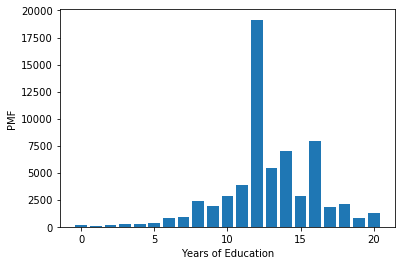

In [5]:
pmf_educ.bar(label='educ')
plt.xlabel('Years of Education')
plt.ylabel('PMF')
plt.show()

## CDF - Cumulative Distribution Function

In [6]:
# import library
from empiricaldist import Cdf

In [7]:
cdf_age = Cdf.from_seq(gss['age'])

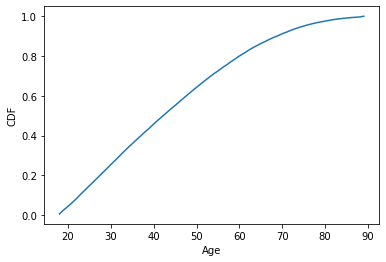

In [8]:
cdf_age.plot()
plt.xlabel('Age')
plt.ylabel('CDF')
plt.show()

In [9]:
p = cdf_age(51)
print(p)

0.6602013455146835


In [10]:
q = cdf_age.inverse(0.25)
print(q)

30.0


In [11]:
cdf_income = Cdf.from_seq(gss['realinc'])

In [12]:
# Calculate the 75th percentile 
percentile_75th = cdf_income.inverse(0.75)

# Calculate the 25th percentile
percentile_25th = cdf_income.inverse(0.25)

# Calculate the interquartile range
iqr = percentile_75th - percentile_25th

# Print the interquartile range
print(iqr)

29676.0


## Comparison PMF dan CDF

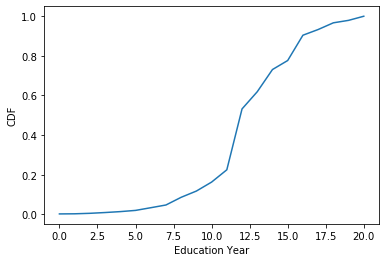

In [13]:
# Select realinc
income = gss['educ']

# Make the CDF
cdf_income = Cdf.from_seq(income)

# Plot it
cdf_income.plot()

# Label the axes
plt.xlabel('Education Year')
plt.ylabel('CDF')
plt.show()

In [14]:
cdf_income[12]

0.5322611710323575

In [15]:
# Select educ
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)
print(bach.mean())

# Associate degree
assc = (educ >= 14) & (educ < 16)
print(assc.mean())

# High school (12 or fewer years of education)
high = (educ <= 12)
print(high.mean())

0.2228572343354785
0.1571414849678225
0.5308807991547402


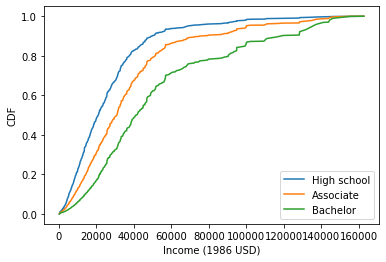

In [16]:
income = gss['realinc']

# Plot the CDFs
Cdf.from_seq(income[high]).plot(label='High school')
Cdf.from_seq(income[assc]).plot(label='Associate')
Cdf.from_seq(income[bach]).plot(label='Bachelor')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()

## The normal distribution

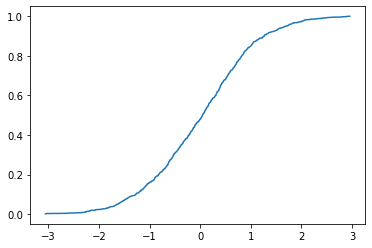

In [18]:
sample = np.random.normal(size=1000)
Cdf.from_seq(sample).plot()

## The bell curve

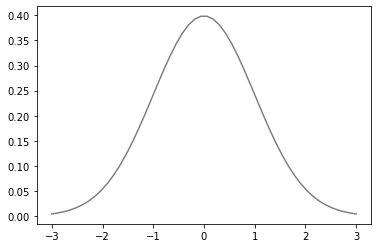

In [20]:
from scipy.stats import norm

xs = np.linspace(-3, 3)
ys = norm(0,1).pdf(xs)
plt.plot(xs, ys, color='gray')

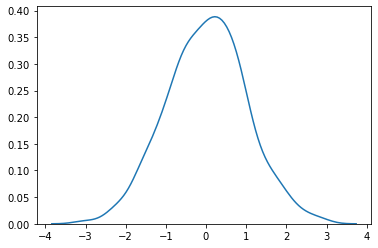

In [21]:
import seaborn as sns
sns.kdeplot(sample)

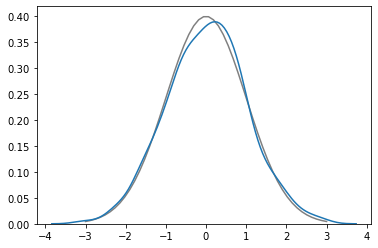

In [22]:
xs = np.linspace(-3, 3)
ys = norm(0,1).pdf(xs)
plt.plot(xs, ys, color='gray')
sns.kdeplot(sample)